In [13]:
import csv

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

articleWordsPath = './data/ArticleWords/'
dataFile = './data/data.csv'

In [3]:
Y = []
data = []

counter = 0
with open(dataFile) as f:
    reader = csv.reader(f)
    for line in reader:
        if line[0] == "hash" or line[6] == "NULL":
            continue
        counter += 1
        deltaT = float(line[6]) - float(line[3]) / 60.0
        deltaIncrease = float(line[5]) / float(line[4])
        if deltaT < 0:
            continue
        if deltaT > 3 and deltaIncrease > 1.00:
            Y.append((1, deltaIncrease))
        else:
            Y.append((0,deltaIncrease))
        #read the words from the article
        with open(articleWordsPath+line[0]+".txt", 'r', encoding="utf-8") as wordFile:
            words = wordFile.readlines()
            turnToString = []
            for word in range(len(words)):
                words[word] = words[word].replace('\n', '')
                turnToString.append(words[word])
            data.append(' '.join(turnToString))
            
matrix = CountVectorizer() #max_features=317
X = matrix.fit_transform(data).toarray()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)



In [5]:
Y_train = [i[0] for i in Y_train] #split Y_train into just the classifications
Y_test_values = [i[1] for i in Y_test]
Y_test = [i[0] for i in Y_test]
cp = sum(Y_train)/len(Y_train)
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

In [6]:
truePos = 0
trueNeg = 0
falsePos = 0
falseNeg = 0
for i in range(len(Y_test)):
    if Y_pred[i] == 1 and Y_pred[i] == Y_test[i]:
        truePos += 1
    elif Y_pred[i] == 0 and Y_pred[i] == Y_test[i]:
        trueNeg += 1
    elif Y_pred[i] == 1 and Y_pred[i] != Y_test[i]:
        falsePos += 1
    else:
        falseNeg +=1
print("\tTrue Positive: ", truePos/len(Y_test))
print("\tTrue Negative: ", trueNeg/len(Y_test))
print("\tFalse Positive: ", falsePos/len(Y_test))
print("\tFalse Negative: ", falseNeg/len(Y_test))
print("\tOverall Accuracy:", accuracy)


	True Positive:  0.7884615384615384
	True Negative:  0.019230769230769232
	False Positive:  0.0641025641025641
	False Negative:  0.1282051282051282
	Overall Accuracy: 0.8076923076923077


In [9]:
balance = 100.00
balanceOverTime = [100]
print("Starting Balance: $100\nInvestment Amount: 25%")

for i in range(len(Y_pred)):
    if Y_pred[i] == 1:
        #get 10% of the current balance because you'd never risk everything at once
        testMoney = balance * .25
        #withdraw from account
        balance -= testMoney
        testMoney *=  Y_test_values[i]
        #sell and put back into account
        balance += testMoney
        balanceOverTime.append(balance)
    # else we do nothing because the classifier told us to take no action
print("Ending Balance: $", balance)
# is about 4 Days worth of running


Starting Balance: $100
Investment Amount: 25%
Ending Balance: $ 642.4478693462355


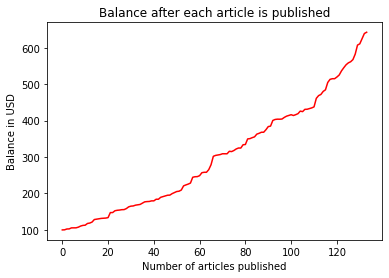

In [12]:
plt.title("Balance after each article is published")
plt.xlabel("Number of articles published")
plt.ylabel("Balance in USD")
plt.plot(balanceOverTime, color="red")
plt.savefig("BalanceOverTime.png")
plt.show()

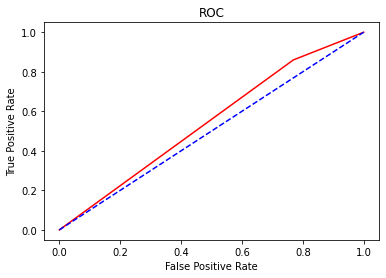

In [22]:
'''
Y_proba = classifier.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresh = roc_curve(Y_test, Y_proba)
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(false_positive_rate, true_positive_rate, color="red")
plt.plot([0,1],[0,1], color="blue", linestyle='--')
plt.show()'''